## Guided Project: Popular Data Science Questions
---

We are working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms. In this guided project, we are tasked with figuring out what is best content to write about.

We decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?"

We decide to investigate Stack Exchange, a question and answer website network. Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science.

After a spending some time investigating the website, we decide that the tags will be very useful in categorizing content, saving us the trouble of us having to do it ourselves.

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database: https://data.stackexchange.com/datascience/query/new

### Description of data columns

The post table has a lot of columns. We will focus our attention on the follwing ones which are relevant towards our goal:
Id: An identification number for the post.
PostTypeId: An identification number for the type of post.

| Column      | Description|
|:-------------|:------------|
|Id           |An identification number for the post|
|PostTypeId           |An identification number for the type of post|
|CreationDate           |The date and time of creation of the post|
|Score           |The post's score|
|ViewCount           |How many times the post was viewed|
|Tags           |What tags were used|
|AnswerCount           |How many answers the question got (only applicable to question posts)|
|FavoriteCount           |How many times the question was favored (only applicable to question posts)|

We run a query against the SEDE DSSE database that extracts the columns listed above for all the questions in 2019. The result of the query was stored in a file called 2019_questions.csv.

#### Import necessary libraries

In [1]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read the dataset

In [2]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB
None


In [4]:
# Missing values
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [5]:
#Percentage of missing values
df.isnull().sum()/df.shape[0]*100

Id                0.00000
CreationDate      0.00000
Score             0.00000
ViewCount         0.00000
Tags              0.00000
AnswerCount       0.00000
FavoriteCount    84.08191
dtype: float64

We see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [6]:
df["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

#### Cleaning the Data

In [7]:
#Fill in the missing values with 0
df = df.fillna(0)

Set the types of each column

In [8]:
df['CreationDate'] = df['CreationDate'].astype('datetime64[ns]')
df['FavoriteCount'] = df['FavoriteCount'].astype('int')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB
None


Clean the Tags column and assign it back to itself:

In [9]:
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")


In [10]:
print(df["Tags"].head(10))

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
5                                        [fuzzy-logic]
6    [time-series, anomaly-detection, online-learning]
7                               [matrix-factorisation]
8                [correlation, naive-bayes-classifier]
9    [machine-learning, python, deep-learning, kera...
Name: Tags, dtype: object


In [11]:
df.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2461,47572,2019-03-19 02:51:26,0,30,"[data-mining, dataset, data-cleaning, sql, tex...",0,1
3927,49222,2019-04-13 01:05:42,0,19,"[neural-network, image-classification]",1,0
2899,60128,2019-09-12 17:51:29,1,6,"[image-classification, computer-vision, image-...",0,0


#### Most Used and Most Viewed


In [12]:
# Most used tags
tags_count={}
            
for t in df["Tags"]:
    for tag in t:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1

In [13]:
#Transform tags_count into a dataframe
tags_count = pd.DataFrame.from_dict(tags_count, orient="index")
tags_count.rename(columns={0: "Count"}, inplace=True)

In [14]:
#Most 20 used tags
most_used = tags_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


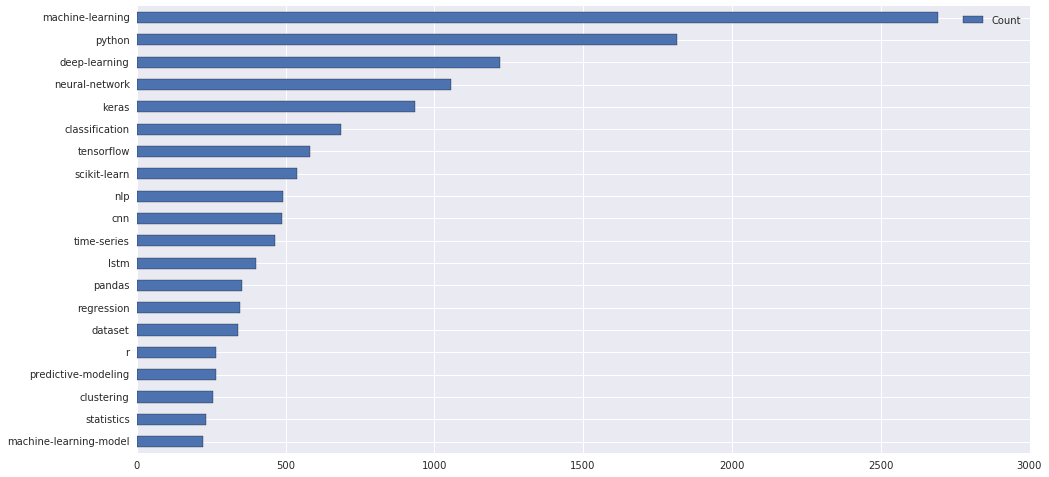

In [15]:
# Visualization for the 20 most used tags
most_used.plot(kind="barh", figsize=(16,8))


In [16]:
# Most viewed tags
tags_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tags_view_count:
            tags_view_count[tag] += row['ViewCount']
        else:
            tags_view_count[tag] = row['ViewCount']
            
tags_view_count = pd.DataFrame.from_dict(tags_view_count, orient="index")
tags_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tags_view_count.sort_values(by="ViewCount").tail(20)

most_viewed

,ViewCount
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


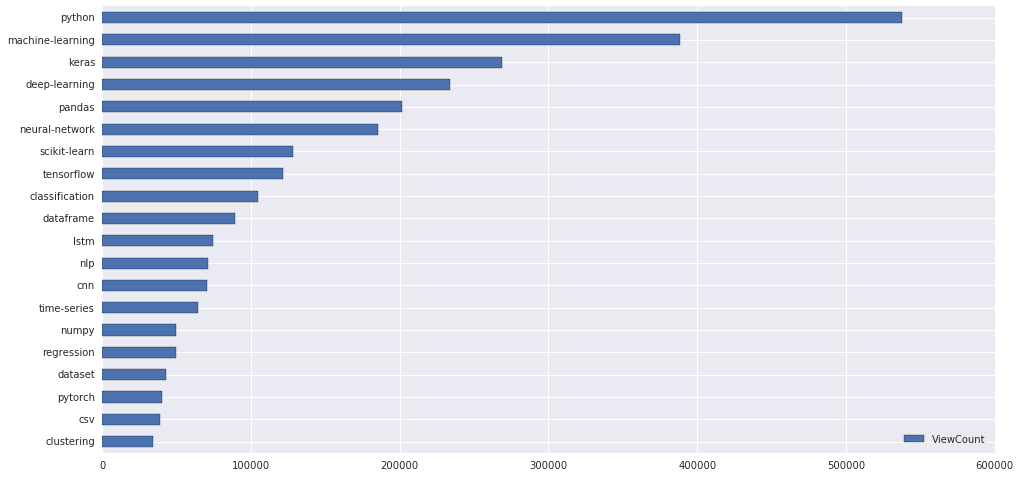

In [17]:
# Visualization for the 20 most viewed tags
most_viewed.plot(kind="barh", figsize=(16,8))

Tags are in most_used, but not in most_viewed.

In [18]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


Tags are in most_viewed, but not in most_used.

In [19]:
pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

,Count,ViewCount
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


#### Relations Between Tags


Create a list of all tags to count how many times each pair of tags appears together. This will allow us to know how pairs of tags are related to each other.

In [20]:
all_tags = list(tags_count.index)
all_tags[:20]

['least-squares-svm',
 'graphs',
 'torch',
 'spss',
 'class-imbalance',
 'hive',
 'market-basket-analysis',
 'label-flipping',
 '.net',
 'redshift',
 'attention-mechanism',
 'numerical',
 'probability-calibration',
 'arima',
 'data-transfer',
 'python',
 'inception',
 'orange',
 'hyperparameter-tuning',
 'mcmc']

Create a dataframe where each row will represent a tag, and each column as well.

In [ ]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:5,0:5]

,least-squares-svm,graphs,torch,spss,class-imbalance
least-squares-svm,NaN,NaN,NaN,NaN,NaN
graphs,NaN,NaN,NaN,NaN,NaN
torch,NaN,NaN,NaN,NaN,NaN
spss,NaN,NaN,NaN,NaN,NaN
class-imbalance,NaN,NaN,NaN,NaN,NaN


Fill the associations dataframe with zeroes and then, for each lists of tags in df["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [ ]:
associations.fillna(0, inplace=True)

for tag in df["Tags"]:
    associations.loc[tag, tag] += 1


We will focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

In [ ]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [ ]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.